In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import pandas as pd
import scipy

import os
from datetime import datetime
from datetime import timedelta
import glob
from skimage import io, filters

#from tqdm import tqdm

from IPython.display import Image

from matplotlib import animation, rc
from IPython.display import HTML

#from tqdm import tnrange, tqdm_notebook
from time import sleep

# Propagating Mode-1 Internal Waves Along a Channel

## Introduction

Internal gravity waves propagate in a density stratified fluids.  In this lab scale experiment, we measure the phase speed and amplitude of three vertically trapped, mode-1 internal waves in a linear stratified fluid as the waves propagate within a tank.

## Procedure

The tank is filled with linearly stratified salt water using the modified double bucket apparatus. The density profile is measured with a conductivity probe.  Waves are generated with mode-1 wave generator.  The waves were required with a digital video camera and analyzed using digital synthetic schlieren.

- October 13, 2016
    - Filled the tank
- October 14, 2016
    - Calibrated the conductivity probe
    - Measured the stratification
    - Trial A: Wave maker set to a rotation rate of 800 rpm
    - Trial B: Wave maker set to a rotation rate of 600 rpm
    - Trial C: Wave maker set to a rotation rate of 400 rpm
    - Measured the stratification

## Results

### Tank filling

The tank was filled with the program

`python tank_fill.py`

and it took 180 minutes.  The tank was filled to a depth of 

In [3]:
H = 52 # cm

### Conductivity Probe Calibration

The conductivity was calibrated with the following data:

    sample  density temperature(C) water (mL) salt (gr) probe measurements 
    #1      1.0315  22.3           145        8         2016-10-14 14:12:50.921150 -0.915168
                                                        2016-10-14 14:12:52.916419 -0.915168
                                                        2016-10-14 14:12:54.806672 -0.915168
                                                        2016-10-14 14:12:56.696733 -0.925216
                                                        2016-10-14 14:12:58.692781 -0.940288
                                                        2016-10-14 14:13:00.688460 -0.940288
                                                        2016-10-14 14:13:02.053704 -0.940288
                                                        2016-10-14 14:13:04.680105 -0.940288
                                                        2016-10-14 14:13:06.885541 -0.950336
                                                        2016-10-14 14:13:08.356300 -0.960384

    #2      1.0238  22.9           150        4         2016-10-14 14:28:10.873700 0.345856
                                                        2016-10-14 14:28:12.344588 0.355904
                                                        2016-10-14 14:28:14.445551 0.35088
                                                        2016-10-14 14:28:16.336319 0.406144
                                                        2016-10-14 14:28:18.542538 0.406144
                                                        2016-10-14 14:28:20.537759 0.406144
                                                        2016-10-14 14:28:22.428586 0.40112
                                                        2016-10-14 14:28:24.739298 0.40112
                                                        2016-10-14 14:28:26.630370 0.396096
                                                        2016-10-14 14:28:28.731446 0.396096
                                                   
    #3      1.0087  23.1           160        3         2016-10-14 14:38:44.502343 2.757376
                                                        2016-10-14 14:38:46.413410 2.827712
                                                        2016-10-14 14:38:48.657508 2.993504
                                                        2016-10-14 14:38:50.767593 3.008576
                                                        2016-10-14 14:38:52.566113 3.018624
                                                        2016-10-14 14:38:54.587724 3.028672
                                                        2016-10-14 14:38:56.592030 3.028672
                                                        2016-10-14 14:38:58.512474 3.033696
                                                        2016-10-14 14:39:00.730708 3.033696
                                                        2016-10-14 14:39:02.448984 3.028672

The data was generated with the

`python sample.py`

command. Different samples were prepared by adding the recorded amount of salt to the recorded amount of water.  The density of each sample was measured using an Anton Paar density meter. 

The calibration data used is the last measured voltage drop for each salt water sample of different density.

In [4]:
calibration_data = [ [1.0315, -0.960384],
                     [1.0238, 0.396096],
                     [1.0087, 3.028672] ]

### Density Profile

Conductivity measurements were made with the command

`python move_and_sample.py 50 > <filename>`

The conductivity probe was used to take two profiles:
    - sample_201610141448.csv
    - afterprofile_201610141606.csv


Each profile file was hand-edited to be to conform to a CSV file.  Each file has the following structure:

    date,time,steps,depth,voltage
    2016-10-13,16:13:08.189549,20655,10.3275,4.782048
    2016-10-13,16:13:08.296372,20656,10.328,4.812192
    2016-10-13,16:13:08.403504,20676,10.338,4.782048
    2016-10-13,16:13:08.510635,20719,10.3595,4.817216

In [5]:
#data_dir = '/Users/jmunroe/Insync/labdata'
data_dir = '/home/evankielley/research/wavetank/'

profile1 = pd.read_csv(os.path.join(data_dir, 'profiles/sample_201610141448.csv'))
profile2 = pd.read_csv(os.path.join(data_dir, 'profiles/afterprofile_201610141606.csv'))

profiles = pd.concat((profile1, profile2))

<IPython.core.display.Javascript object>


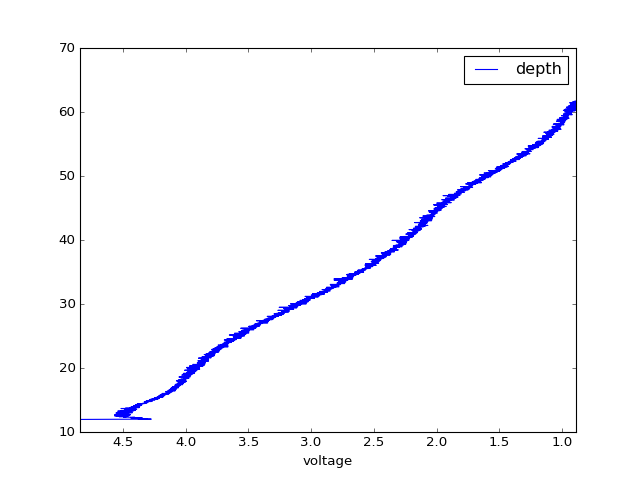

In [6]:
profile1.plot(x='voltage', y='depth', kind='line')

### Videos

Digital video was recorded in 30 second segments at 10 frames per second.  Each frame was labelled 
    
    1.jpg
    ...
    299.jpg

within a segment

Files are stored in

In [7]:
#dvpath = data_dir
dvpath = os.path.join(data_dir, 'dv')

and the subdirectories are

In [8]:
dvfiles = ['dv_20161014154210','dv_20161014154241','dv_20161014154312',
            'dv_20161014154343','dv_20161014154413','dv_20161014154445',
            
            'dv_20161014154515','dv_20161014154546','dv_20161014155419',
            'dv_20161014155450','dv_20161014155521','dv_20161014155552',
            'dv_20161014155623','dv_20161014155654',
            
            'dv_20161014160132','dv_20161014160203','dv_20161014160234',
            'dv_20161014160305','dv_20161014160336','dv_20161014160407',
           ]

where the videos have been grouped by experiment. All frames look like the image below:

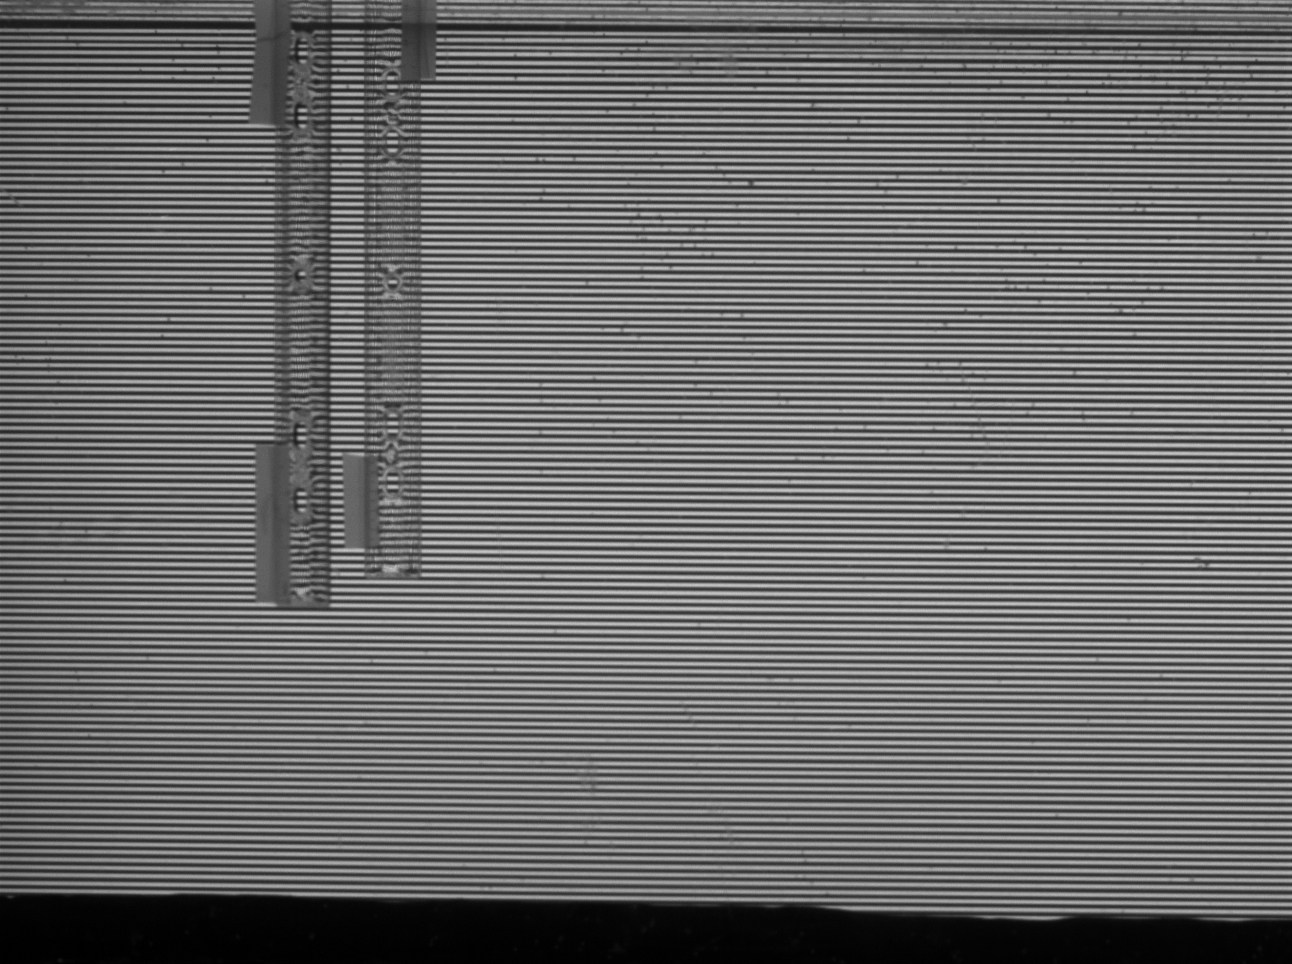

In [9]:
filename = os.path.join(dvpath, 'dv_20161014154210/1.jpg')
Image(filename, width=600)

We can group the frames into movies according to experiment. We should be able to map time to image frame.

In [10]:
images = []
times = []

# make a list of all frames available for analysis
for dvfile in dvfiles:
    dvfiledir = os.path.join(dvpath, dvfile)
    
    # find timestamp of bundle
    timestamp = dvfile.split('_')[1]
    timestamp = datetime.strptime(timestamp, '%Y%m%d%H%M%S')
    
    # get list of all image files
    imagefiles = glob.glob(os.path.join(dvfiledir,'*.jpg'))
    for imagefile in imagefiles:
        basename = os.path.basename(imagefile)
        n = int(basename.split('.')[0])
        dt = timedelta(seconds=(n-1)/10)
        t = timestamp + dt
        
        times.append(t)
        images.append(imagefile)
        
frames = pd.Series(images, index=times).reindex(index=sorted(times))

In [11]:
frames[340]

'/home/evankielley/research/wavetank/dv/dv_20161014154241/42.jpg'

In [12]:
frames.index[300]

Timestamp('2016-10-14 15:42:41.100000')

## Analysis

<IPython.core.display.Javascript object>


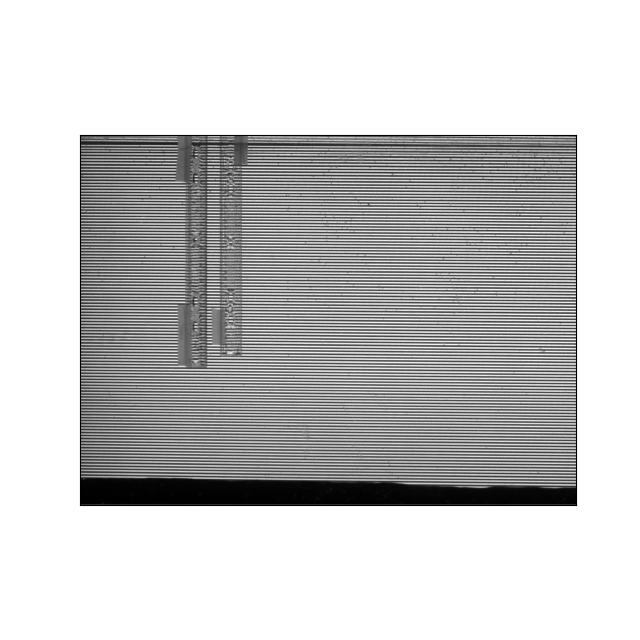

[0, 1292, 964, 0]

In [13]:
img = io.imread(frames[0])
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
plt.gray()
ax.imshow(img)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

### Synthetic Schlieren

Local changes in density due to the passing of internal gravity waves cause changes in the index of refraction.  These index of refraction changes are observed as vertical perturbations of the image in time.

### Qualitative Synthetic Schlieren

The simplest approach is to subtract a reference image from the current image.

<IPython.core.display.Javascript object>


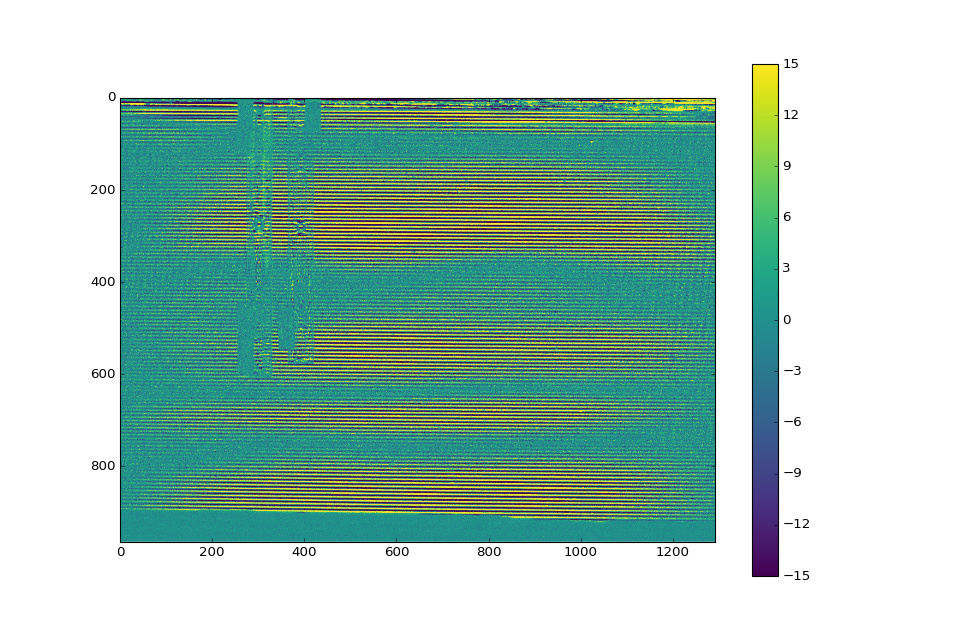

In [14]:
ref_img = io.imread(frames[1000])*1.0
img = io.imread(frames[2005])
diff = img - ref_img

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

m = ax.imshow(diff,
             cmap=plt.get_cmap('viridis'),
             clim = [-15, 15])
#ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])
cb = fig.colorbar(m)

In [128]:
from matplotlib import animation, rc
from IPython.display import HTML

<IPython.core.display.Javascript object>


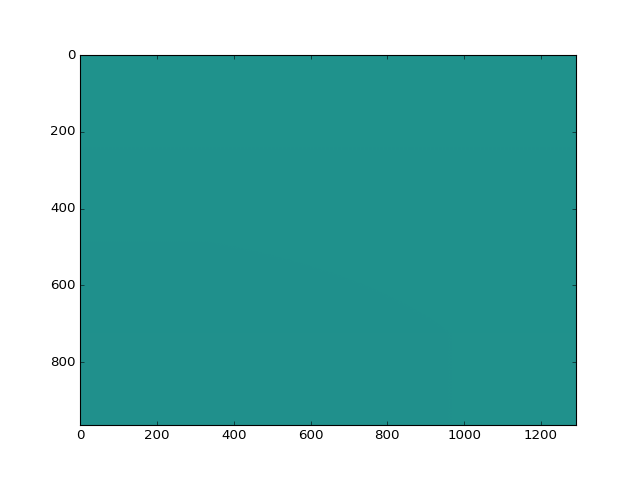

In [15]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

#ax.set_xlim(( 0, 1284))
#ax.set_ylim((0, 984))
ax.invert_yaxis()
im = ax.imshow(diff,
             cmap=plt.get_cmap('viridis'),
             clim = [-10, 10])


In [130]:
# initialization function: plot the background of each frame
def init():
    im.set_array(ref_img)
    return (im,)

In [16]:
# animation function. This is called sequentially
def animate(i):
    ref_img = io.imread(frames[1500])
    img = io.imread(frames[2000+i])
    diff = img - ref_img
    im.set_array(diff)
    return (im,)

In [17]:
# call the animator. blit=True means only re-draw the parts that have changed.
#anim = animation.FuncAnimation(fig, animate, init_func=init,frames=50, interval=30, blit=True)

In [18]:
#HTML(anim.to_html5_video())

In [19]:
# equivalent to rcParams['animation.html'] = 'html5'
#rc('animation', html='html5')

In [20]:
#anim

## Quantitative Schlieren

In [20]:
def schlieren(img1_filename, img2_filename, 
              window = None,
              **kwargs):
    """
    Apply Synthetic Schlieren algorithm for a pair of images (8bit, grayscale)
    """
    
    image1 = io.imread(img1_filename)
    image2 = io.imread(img2_filename)
    
    if window is not None:
        image1 = image1[window]
        image2 = image2[window]
        
    dz = schlieren_lines(image1, image2, **kwargs)

    return dz

In [21]:
def schlieren_lines(image1, image2, 
                    method = 'new',
                    clip_large_values = True,
                    sigma = 0.3,
                    apply_mintol = True,
                    apply_mean_filter = True,
                    apply_gaussian_filter = True,
                    **kwargs):
    
    """
    Apply Synthetic Schlieren algorithm for a pair of images (8bit, grayscale)
        takes two arrays as input
    
    Assumes background image is horizontal dark and light lines.
    
    returns array
    """

    # step 1: calculate the vertical displacement dz in pixel coordinates
    if method == 'new':
        dz = compute_deltaz(image1, image2)
    else:
        dz = compute_dz(image1, image2)

    if apply_mintol:
        # step 2: find a mask of the pixels of the image that are monotonically increasing
        C = getTol(image1)
    
        # step 3: convert the nan's  into 0's and multiply the array with the getTol mask to select
        # the pixels that are relevant
        dz = np.nan_to_num(dz) * C

    # step 4: clip the large values
    if clip_large_values:
        min_max = 0.03
        clip_min_max = 0.95 * min_max
        dz[dz > clip_min_max] = clip_min_max
        dz[dz < -clip_min_max] = -clip_min_max
    
    if apply_mean_filter:
        # Step 5 : map the original data from -0.1 to +0.1 to range from 0 to 255
        mapped_dz = np.uint8((dz + min_max)/ (2.0 * min_max) * 256)

        # Implementing the skimage.filter.mean so as to apply mean filter on a
        # masked array and then applying a gaussian filter to smooth the image

        # step 6: prepare a mask:: Mask value 1: use the data and 0: ignore the data here within the disk
        mask_dz = np.uint8(mapped_dz !=128)

        #Step 7 : apply the mean filter to compute values for the masked pixels
        # Apply the filter in Z not in X.
        disk_size = 10
        row_disk = np.ones((disk_size,1))
        filt_dz = filters.rank.mean(mapped_dz,
                #skimage.morphology.disk(disk_size),
                row_disk,
                mask = mask_dz,
                )

        # Step 8: setting the zeros in the filt_delz to 128
        filt_dz[filt_dz ==0] = 128

        # Step 9: mapping back the values from 0 to 255 to its original values of
        # -0.1 to 0.1
        filtered_dz = (filt_dz / 256.0) * (2.0 * min_max) - min_max

    # Step 10: Replacing the elements that were already right in the beginning
        dz = (1-mask_dz) * filtered_dz + mask_dz * dz

    if apply_gaussian_filter:
        # Step 11 : applying the Gaussian filter to do a spatial smoothing of the image
        # apply the gaussian smoothing along Z
        dz = filters.gaussian(dz, sigma, 1)

    return dz

In [22]:
def getTol(image, mintol = 10):
    """
    estimate monotonicity of data
    
    returns a mask array
    """

    nrows, ncols = image.shape
    #nrows, ncols = 60, 60

    
    # work with float point arrays
    image = image.astype(np.float32)

    # compute diference between rows
    d = image[:-1,:] - image[1:,:]
    z = np.zeros(ncols)
    # construct array of difference between current and upper
    A = np.vstack((d, z))
    # and between current and lower row
    B = np.vstack((z, d))
    # only estimate if the sequence is monotonic and 
    # differences are at least mintol 
    C = (abs(A) >= mintol) & (abs(B) >= mintol) & (A*B>0)
    
    return C

In [23]:
def compute_dz(im1, im2):
    """
    Estimate dz in pixel coordinates between two given two images im1 and im2 (im1 is the reference image)
    """

    # make sure images are float
    im1 = im1.astype(np.float32)
    im2 = im2.astype(np.float32)

    # assert img1.shape = img2.shape
    N, M = im1.shape
    zerorow = np.zeros(M)

    A = im2[:,:] - im1[:,:]
    #   0,1,2,N-1   0,1,2,3, N-1

    B = im2[:-1,:] - im1[1:,:]
    B = np.vstack((B, zerorow))

    #     1,2,3,..N-1   -   0,1,2,..N-2
    C = im2[1:,:] - im1[:-1,:]
    C = np.vstack((zerorow, C))

    D = im1[:-1,:] - im1[1:,:]
    D = np.vstack((zerorow, D))

    E = im1[:-2,:] - im1[2:,:]
    E = np.vstack((zerorow, E, zerorow))

    F = im1[1:,:] - im1[:-1,:]
    F = np.vstack((F, zerorow))

    ans = - A/E * (B/D + C/F)
    
    UP = np.vstack((zerorow, ans[1:,:]))
    DOWN = np.vstack((ans[:-1,:], zerorow))
    
    ans = (UP + ans + DOWN)/3

    return ans

In [24]:
def compute_deltaz(im1, im2):

    # make sure images are float
    im1 = im1.astype(np.float32)
    im2 = im2.astype(np.float32)

    # assert img1.shape = img2.shape
    N, M = im1.shape
    zerorow = np.zeros(700)
    ans = np.zeros((700,700))
    #ans2 = np.zeros((700,700))
    
    for j in range(0,700):
        for i in range(0,698):
            p = 0
            for k in range(3):
                A = im2[i,j] - im1[i,j]
                #   0,1,2,N-1   0,1,2,3, N-1

                B = im2[i,j] - im1[i+1,j]
                #B = np.vstack((B, zerorow))

                #     1,2,3,..N-1   -   0,1,2,..N-2
                C = im2[i+1,j] - im1[i-1,j]
                #C = np.vstack((zerorow, C))

                D = im1[i-1,j] - im1[i+1,j]
                #D = np.vstack((zerorow, D))

                E = im1[i-2,j] - im1[i+2,j]
                #E = np.vstack((zerorow, E, zerorow))

                F = im1[i+1,j] - im1[i-1,j]
                #F = np.vstack((F, zerorow))

                temp = - A/E * (B/D + C/F)
                p += temp/3

            ans[i,j] = p

    return ans       
    

Test this algorithm

In [25]:
n0 = 750
xmin, xmax = 500, 1200
ymin, ymax = 100, 800

dz = schlieren(frames[0], frames[n0],
               sigma = 5,
               window = (slice(ymin, ymax), slice(xmin, xmax)),
              apply_mintol =True,
              apply_mean_filter = True,
              apply_gaussian_filter = True,)
              
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ref_image = io.imread(frames[0])
background = ax.imshow(ref_image,
             cmap=plt.get_cmap('gray'),
             clim = [0, 255],
             extent = (0, img.shape[1], img.shape[0], 0))

im = ax.imshow(dz,
             cmap=plt.get_cmap('seismic'),
             clim = [-0.05, 0.05],
             extent = (xmin, xmax, ymax, ymin))

#ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])
title = ax.set_title('')
cb = fig.colorbar(m)

numframes = 100

<IPython.core.display.Javascript object>

In [26]:
def make_one_frame(i):
    n0 = 750
    xmin, xmax = 500, 1200
    ymin, ymax = 100, 800

    # creating a figure
    fig, ax = plt.subplots(1,3, figsize=(20, 16))

    show_background = False
    if show_background:
        # use raw image as background
        ref_image = io.imread(frames[0])
        ax[0].imshow(ref_image,
                     cmap=plt.get_cmap('gray'),
                     clim = [0, 255],
                     extent = (0, img.shape[1], img.shape[0], 0))
        ax[1].imshow(ref_image,
                     cmap=plt.get_cmap('gray'),
                     clim = [0, 255],
                     extent = (0, img.shape[1], img.shape[0], 0))


        #ax.set_xticks([]), ax.set_yticks([])
        ax[0].axis([0, img.shape[1], img.shape[0], 0])
        ax[1].axis([0, img.shape[1], img.shape[0], 0])


    n = n0 + 5*i

    title = ax[0].set_title('')
    #title.set_text('{} (n={})'.format(frames.index[n].strftime('%H:%M:%S'), n) )
    title.set_text('Dz New')
    
    title = ax[1].set_title('')
    #title.set_text('{} (n={})'.format(frames.index[n].strftime('%H:%M:%S'), n) )
    title.set_text('Dz Old')
    
    title = ax[2].set_title('')
    #title.set_text('{} (n={})'.format(frames.index[n].strftime('%H:%M:%S'), n) )
    title.set_text('Dz Difference')

    
    with Timer('OldMethod'):
        
        dz_old = schlieren(frames[0], frames[n],
                       method = 'old',
                       sigma = 5,
                       window = (slice(ymin, ymax), slice(xmin, xmax)),
                       apply_mintol = True,
                       apply_mean_filter = True,
                       apply_gaussian_filter = True,)

    plt.subplot(311); plt.imshow(dz_old,
                 cmap=plt.get_cmap('seismic'),
                 clim = [-0.05, 0.05],
                 extent = (xmin, xmax, ymax, ymin))
    plt.title('Dz New')
    plt.xlabel('Vertical Pixel Coordinate', fontsize=12)
    plt.ylabel('Horizontal Pixel Coordinate', fontsize=12)
    cb = plt.colorbar(m,fraction=0.046, pad=0.04)

    
    with Timer('NewMethod'):
        dz_new = schlieren(frames[0], frames[n],
                       sigma = 5,
                       window = (slice(ymin, ymax), slice(xmin, xmax)),
                       apply_mintol = True,
                       apply_mean_filter = True,
                       apply_gaussian_filter = True,)

    plt.subplot(312); plt.imshow(dz_new,
                 cmap=plt.get_cmap('seismic'),
                 clim = [-0.05, 0.05],
                 extent = (xmin, xmax, ymax, ymin))
    plt.title('Dz Old')
    plt.xlabel('Vertical Pixel Coordinate', fontsize=12)
    plt.ylabel('Horizontal Pixel Coordinate', fontsize=12)
    cb = plt.colorbar(m,fraction=0.046, pad=0.04)


    plt.subplot(313); plt.imshow(dz_old - dz_new,
                cmap=plt.get_cmap('seismic'),
                 clim = [-0.005, 0.005],
                 extent = (xmin, xmax, ymax, ymin))
    plt.title('Dz Difference')
    plt.xlabel('Vertical Pixel Coordinate', fontsize=12)
    plt.ylabel('Horizontal Pixel Coordinate', fontsize=12)
    cb = plt.colorbar(m,fraction=0.046, pad=0.04)
    
    return dz_old, dz_new
    
dz_old, dz_new = make_one_frame(0)


#cb = fig.colorbar(im)

<IPython.core.display.Javascript object>

NameError: name 'Timer' is not defined

In [ ]:
n0 = 750
xmin, xmax = 500, 1200
ymin, ymax = 100, 800

dz = schlieren(frames[0], frames[n0],
               sigma = 5,
               window = (slice(ymin, ymax), slice(xmin, xmax)),
              apply_mintol =True,
              apply_mean_filter = True,
              apply_gaussian_filter = True,)
              
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ref_image = io.imread(frames[0])
background = ax.imshow(ref_image,
             cmap=plt.get_cmap('gray'),
             clim = [0, 255],
             extent = (0, img.shape[1], img.shape[0], 0))

im = ax.imshow(dz,
             cmap=plt.get_cmap('viridis'),
             clim = [-0.05, 0.05],
             extent = (xmin, xmax, ymax, ymin))

#ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])
title = ax.set_title('')
cb = fig.colorbar(m)

numframes = 100

pbar = tqdm_notebook(total=numframes, desc='Rendering', leave=True)

# animation function. This is called sequentially
def animate(i):
    n = n0 + 5*i
    title.set_text('{} (n={})'.format(frames.index[n].strftime('%H:%M:%S'), n) )
    
    dz = schlieren(frames[0], frames[n],
                   sigma = 5,
                   window = (slice(ymin, ymax), slice(xmin, xmax)),
                   apply_mintol = True,
                   apply_mean_filter = True,
                   apply_gaussian_filter = True,)
    
    im.set_array(dz)
    pbar.update()

    
    return (im,title)

# initialization function: plot the background of each frame
def init():
    im.set_array(ref_img)
    return (background,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=numframes, interval=300, blit=True)
_ = anim.to_html5_video()

pbar.close()
plt.close(fig)

#anim

In [27]:
im1 = io.imread(frames[0])
im2 = io.imread(frames[750])

compute_deltaz(im1, im2)

array([[ 0.        , -0.03038298, -0.01111111, ...,  0.1524049 ,
         0.19335082,  0.1762726 ],
       [-0.17277613, -0.15175375, -0.09186352, ..., -0.0261578 ,
        -0.00855763,  0.        ],
       [-0.18012422, -0.06565657,  0.07949126, ..., -0.04017857,
        -0.02262444, -0.03296704],
       ..., 
       [-0.01485749,  0.        , -0.09275363, ..., -0.08208955,
        -0.05230769, -0.05650506],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [146]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 16)


f_old = np.fft.fft2(dz_old, norm='ortho')
fshift_old = np.fft.fftshift(f_old)
magnitude_spectrum_old = 20*np.log(np.abs(fshift_old))

freq = fftfreq( 700, 0.05 )
freq = np.fft.fftshift(freq)

#plt.subplot(121),plt.imshow(dz_old, cmap = 'seismic')
#cb = plt.colorbar(m,fraction=0.046, pad=0.04)
#plt.title('Dz New'), plt.xticks([]), plt.yticks([])
plt.subplot(311),plt.imshow(magnitude_spectrum_old, cmap = 'seismic',interpolation='nearest', extent=[freq[0],freq[-1],freq[0],freq[-1]])
plt.xlim(-2,2); plt.ylim(-2,2)
plt.title('New Magnitude Spectrum'), #plt.xticks([]), plt.yticks([])
plt.xlabel('Frequency (1/cm)', fontsize=12)
plt.ylabel('Frequency (1/cm)', fontsize=12)
cb = plt.colorbar(m,fraction=0.046, pad=0.04)
#plt.show()

f_new = np.fft.fft2(dz_new, norm='ortho')
fshift_new = np.fft.fftshift(f_new)
magnitude_spectrum_new = 20*np.log(np.abs(fshift_new))

#plt.subplot(121),plt.imshow(dz_new, cmap = 'seismic')
#cb = plt.colorbar(m,fraction=0.046, pad=0.04)
#plt.title('Dz Old'), plt.xticks([]), plt.yticks([])
plt.subplot(312),plt.imshow(magnitude_spectrum_new, cmap = 'seismic',interpolation='nearest', extent=[freq[0],freq[-1],freq[0],freq[-1]])
plt.xlim(-2,2); plt.ylim(-2,2)
plt.title('Old Magnitude Spectrum'), #plt.xticks([]), plt.yticks([])
plt.xlabel('Frequency (1/cm)', fontsize=12)
plt.ylabel('Frequency (1/cm)', fontsize=12)
cb = plt.colorbar(m,fraction=0.046, pad=0.04)
#plt.show()

ms_diff = 20*np.log(np.abs(fshift_new - fshift_old))

#plt.subplot(121),plt.imshow(dz_new - dz_old, cmap = 'seismic')
#cb = plt.colorbar(m,fraction=0.046, pad=0.04)
#plt.title('Dz Diff'), plt.xticks([]), plt.yticks([])
ms_diff = magnitude_spectrum_old - magnitude_spectrum_new
plt.subplot(313),plt.imshow(ms_diff, cmap = 'seismic',interpolation='nearest', extent=[freq[0],freq[-1],freq[0],freq[-1]])
plt.xlim(-2,2); plt.ylim(-2,2)
plt.title('Difference Magnitude Spectrum'), #plt.xticks([]), plt.yticks([])
plt.xlabel('Frequency (1/cm)', fontsize=12)
plt.ylabel('Frequency (1/cm)', fontsize=12)

cb = plt.colorbar(m,fraction=0.046, pad=0.04)
plt.show()

plt.savefig('test.png')

Populating the interactive namespace from numpy and matplotlib


NameError: name 'dz_old' is not defined

NameError: name 'magnitude_spectrum_new' is not defined

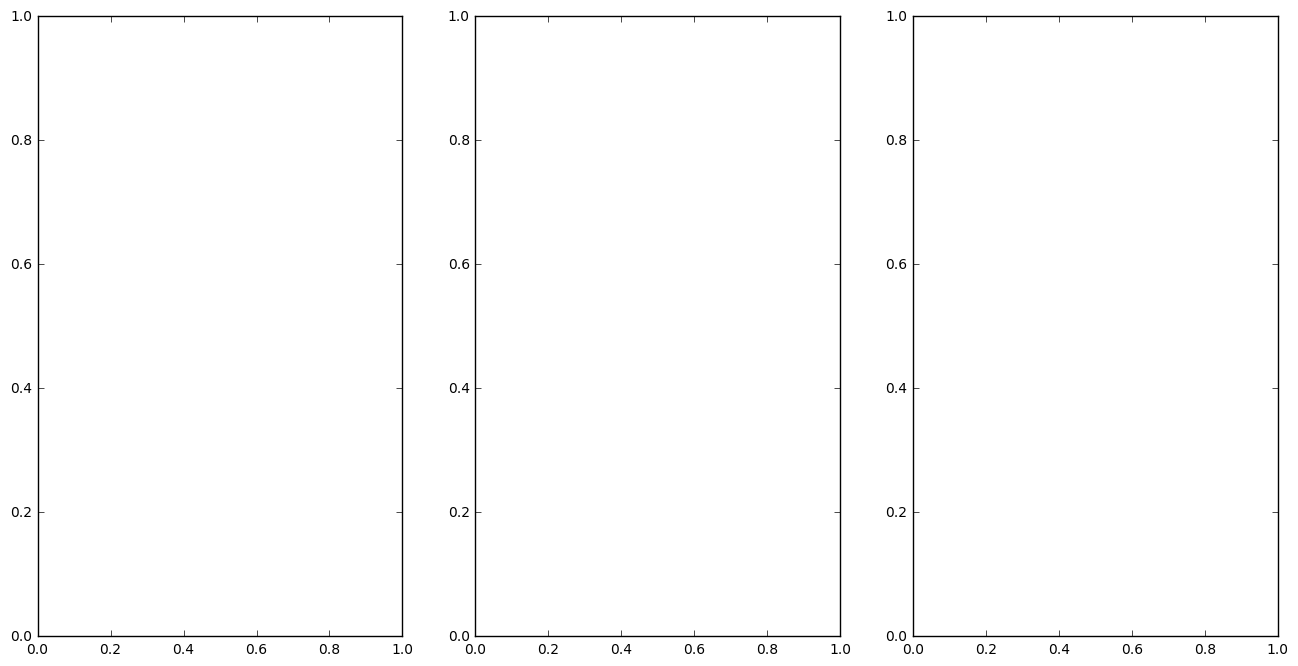

In [147]:
fig, ax = plt.subplots(1,3, figsize=(16, 8))

im = ax[0].imshow(magnitude_spectrum_new, cmap = 'seismic',interpolation='nearest', extent=[freq[0],freq[-1],freq[0],freq[-1]])
plt.xlim(-2,2); plt.ylim(-2,2)
plt.title('Magnitude Spectrum'), #plt.xticks([]), plt.yticks([])
cb = plt.colorbar(m,fraction=0.046, pad=0.04, ax=ax[0])

im = ax[1].imshow(magnitude_spectrum_old, cmap = 'seismic',interpolation='nearest', extent=[freq[0],freq[-1],freq[0],freq[-1]])
plt.xlim(-2,2); plt.ylim(-2,2)
plt.title('Magnitude Spectrum'), #plt.xticks([]), plt.yticks([])
cb = plt.colorbar(m,fraction=0.046, pad=0.04, ax=ax[1])

ax[1].imshow(ms_diff, cmap = 'seismic',interpolation='nearest', extent=[freq[0],freq[-1],freq[0],freq[-1]])
plt.xlim(-2,2); plt.ylim(-2,2)
plt.title('Magnitude Spectrum'), #plt.xticks([]), plt.yticks([])
cb = plt.colorbar(m,fraction=0.046, pad=0.04, ax=ax[2])

In [ ]:
f_new = np.fft.fft2(dz_new, norm='ortho')
fshift_new = np.fft.fftshift(f_new)
magnitude_spectrum_new = 20*np.log(np.abs(fshift_new))

plt.subplot(121),plt.imshow(dz_new, cmap = 'seismic')
cb = plt.colorbar(m,fraction=0.046, pad=0.04)
plt.title('Dz Old'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum_new, cmap = 'seismic',interpolation='nearest', extent=[freq[0],freq[-1],freq[0],freq[-1]])
plt.xlim(-2,2); plt.ylim(-2,2)
plt.title('Magnitude Spectrum'), #plt.xticks([]), plt.yticks([])
cb = plt.colorbar(m,fraction=0.046, pad=0.04)
plt.show()

In [ ]:
ms_diff = 20*np.log(np.abs(fshift_new - fshift_old))

plt.subplot(121),plt.imshow(dz_new - dz_old, cmap = 'seismic')
cb = plt.colorbar(m,fraction=0.046, pad=0.04)
plt.title('Dz Diff'), plt.xticks([]), plt.yticks([])
ms_diff = magnitude_spectrum_old - magnitude_spectrum_new
plt.subplot(122),plt.imshow(ms_diff, cmap = 'seismic',interpolation='nearest', extent=[freq[0],freq[-1],freq[0],freq[-1]])
plt.xlim(-2,2); plt.ylim(-2,2)
plt.title('Magnitude Spectrum'), #plt.xticks([]), plt.yticks([])
cb = plt.colorbar(m,fraction=0.046, pad=0.04)
plt.show()

In [ ]:
ts = frames.index[1]
ts.strftime('%H:%M:%S')

In [ ]:
from tqdm import tnrange, tqdm_notebook
from time import sleep

for i in tnrange(10, desc='1st loop'):
    for j in tqdm_notebook(range(100), desc='2nd loop'):
        sleep(0.01)
    

In [ ]:
def compute_dz(video_id, 
               min_tol, 
               sigma, 
               filter_size,
               skip_frames=1,
               skip_row=1,
               skip_col=1,
               startF=0,stopF=None,diff_frames=1,cache=True):
    """
    Given video_id, calculate the dz array. Output is cached on disk.
    > returns the array dz
    > skip_frames is the number of frames to jump before computing dz

    Returns dz_id
    """
    db = labdb.LabDB()

    # get the number of frames if stopF is unspecified
    if (stopF is None):
        sql = """ SELECT num_frames FROM video WHERE video_id = %d""" % video_id 
        rows = db.execute(sql)
        stopF = rows[0][0]
        print(("stop_frames = ", stopF))
    num_frames=stopF-startF
    print(("num_frames:" ,num_frames))

    # Create the dz nc file to write data to
    dz_filename,dz_id,dt,dz,dx,chunkshape = create_nc_file(video_id,skip_frames,skip_row,skip_col,min_tol,\
            sigma,filter_size,startF,stopF,diff_frames,dz_id = dz_id)

    # Create a temporary dz file.
    temp_dz_filename = create_temp_nc_file(dz_filename)

    # count: start from the second frame. count is the variable that tracks the
    # current frame
    if diff_frames is None:
        count = startF
    else:
        count=startF+diff_frames

    # Set path to the two images
    path = "/Volumes/HD3/video_data/%d/frame%05d.png"

    hostname = socket.gethostname()
    cpu_count = multiprocessing.cpu_count()
    if hostname == 'taylor.physics.mun.ca':
        PROCESSES = cpu_count
    else:
        PROCESSES = cpu_count / 2
    PROCESSES = 8

    # Create pool
    pool = multiprocessing.Pool(PROCESSES)

    p = {}
    p['filename1'] = None
    p['filename2'] = None
    p['skip_row'] = skip_row
    p['skip_col'] = skip_col
    p['filter_size'] = filter_size
    p['min_tol'] = min_tol
    p['dz'] = dz
    p['sigma'] = sigma
    Ls = 13.5 # distance from front of screen to back of tank
    Lb = 0.9 # thickness of barrier
    Ld = 14.9 # width of rear channel
    Lp = 2.4 # thickness of back and front walls
    Lw = 29.5 # width of experimental region of tank
    # index of refraction
    na = 1.00
    np = 1.49
    nb = 1.49
    nw = 1.33
    gamma = 0.0001878 # See eqn 2.8 in Sutherland1999

    # const2 = -1.0/(gamma*((0.5*L_tank*L_tank)+(L_tank*win_l*n_water)))
    # Has been recalculated for our experiment
    dN2dz = (-1.0/(Lw*gamma)) * (1.0/(0.5*Lw+nw/nb*Lb+Ld+nw/nb * Lp + nw/na *Ls))

    # if diff_frames is given, we are computing dN2dt
    if diff_frames is not None:
        dN2dz = dN2dz / (dt*diff_frames)

    logger.debug('dN2dz = {:f}'.format(dN2dz))

    # progress bar
    widgets = [progressbar.Percentage(), ' ', progressbar.Bar(), ' ', progressbar.ETA()]
    pbar = progressbar.ProgressBar(widgets=widgets)
    
    # multiprocessing the task of writing data into nc file
    lock = multiprocessing.Lock()
    def cb(r):
        with lock:
            i, dz = r
            pbar.update(i)

            nc = netCDF4.Dataset(temp_dz_filename, 'a')
            temp_dz = nc.variables['temp_dz_array']
            temp_dz[i, :, :] = dN2dz * dz
            nc.close()

    tasks = []
    #counter for the while loop
    i = 0

    # submit tasks to perform in the while loop and this is in parallel
    while count < stopF:
        if diff_frames is not None:
            ref_frame = count - diff_frames
        else:
            ref_frame = startF

        filename1 = path % (video_id, ref_frame)
        filename2 = path % (video_id, count)

        if not os.path.exists(filename2):
            logger.info('%s not found but expected' % filename2)
            break

        # add filename1, filename2 to list of tasks
        p['filename1'] = filename1
        p['filename2'] = filename2
        p['i'] = i
        #tasks.append( (schlieren_lines, (dict(p),)))

        count += skip_frames

        pool.apply_async(schlieren_lines, (dict(p),), callback=cb)
        i += 1

    if i == 0:
        raise Exception('No pairs of image files found')


    # submit all tasks to worker pool
    pbar.maxval = i 
        
    logger.debug('Schlieren - frame by frame')
    pbar.start()
            
    # wait for all schlieren task to complete
    pool.close()
    pool.join()
                    
    pbar.finish()   
                        
    # open the temporary nc file to put in the time axis
    nc=netCDF4.Dataset(temp_dz_filename,'a')
    temp_dz = nc.variables['temp_dz_array']
                                
    nc.close()                      
                                        
    # The last Step of Synthetic Schlieren... Uniform filtering in time
    # open the temp dz nc file              
    nc = netCDF4.Dataset(temp_dz_filename, 'r')                     
    temp_dz_array = nc.variables['temp_dz_array']                                   
    T = nc.variables['time'][:]       
    
    # open the dz nc file for writing in the data
    dz_nc = netCDF4.Dataset(dz_filename, 'a')
    DZarray = dz_nc.variables['dz_array']
    ZZ = dz_nc.variables['row'][:]
    CC = dz_nc.variables['column'][:]
    TT = dz_nc.variables['time']
    #set the time axis for the dz array.
    TT[:] = T[:]

    t_chunk,r_chunk,c_chunk = chunkshape

    print(("chunk t,z,x :", t_chunk,r_chunk,c_chunk))

    print(("CC size, zz size" , CC.size, ZZ.size))
    col_count= CC.size-1
    row_count= ZZ.size-1

    # step 12 of Schlieren :: apply uniform filter in the time axis with the filter size of 6 (about
    # 1second). This should smoothen the dz along time.

    logger.debug('Schlieren - chunk by chunk')
    # (i, j) should index the ith and jth chunk
    logger.debug('size = {}'.format(temp_dz_array.shape))
    logger.debug('chunkshape = {}'.format(chunkshape) )
    nt, nz, nx = temp_dz_array.shape
    chunk_nt, chunk_nz, chunk_nx = chunkshape

    chunk_nz = chunk_nz * 2
    #chunk_nx = chunk_nx * 8
    
    widgets = [progressbar.Percentage(), ' ', progressbar.Bar(), ' ', progressbar.ETA()]
    pbar = progressbar.ProgressBar(widgets=widgets,
            maxval= (nz // chunk_nz)).start()

    for j in range(nz // chunk_nz):

        pbar.update(j)
        temp = temp_dz_array[:,
                  j*chunk_nz:(j+1)*chunk_nz,
                  :]

        # TODO: why (6, 1, 1)?
        temp_filt = ndimage.uniform_filter(temp,size = (18,1,1))

        DZarray[:,
                j*chunk_nz:(j+1)*chunk_nz,
                :] = temp_filt

        #for i in range(nx // chunk_nx):
#
#            pbar.update(j * (nx//chunk_nx) + i)
#
#            temp = temp_dz_array[:, 
#                                 j*chunk_nz:(j+1)*chunk_nz,
#                                 i*chunk_nx:(i+1)*chunk_nx]
#
#            # TODO: why (6, 1, 1)?
#            temp_filt = ndimage.uniform_filter(temp,size = (6,1,1))
#
#            DZarray[:, 
#                    j*chunk_nz:(j+1)*chunk_nz,
#                    i*chunk_nx:(i+1)*chunk_nx] = temp_filt

    pbar.finish()

    dz_nc.calculation_complete = 1

    dz_nc.close()
    nc.close()

    # remove temp dz file
    os.unlink(temp_dz_filename)

    return dz_id

# Curve fit Synthetic Schlieren

Since our background image is horizontal black and white lines, let's try and fit a rectangular wave form like function to each column.

### Example pixel column

In [14]:
im1 = io.imread(frames[720])  # reference image
im2 = io.imread(frames[750])  # current image

<IPython.core.display.Javascript object>


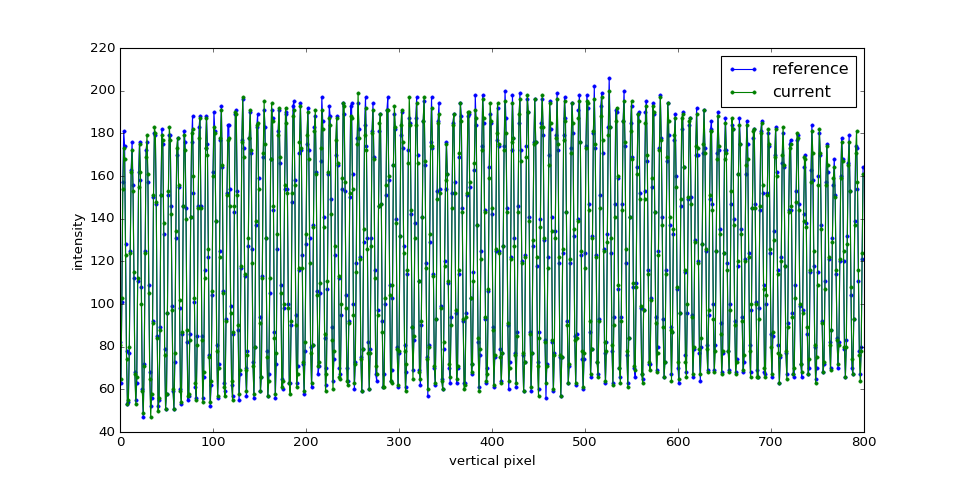

In [15]:
# pick a column
x = 600

zmin = 50; zmax = 850;
col1 = im1[zmin:zmax, x]*1.0
col2 = im2[zmin:zmax, x]*1.0

fig, axes = plt.subplots(figsize=(12
                                  ,6))

plt.plot(col1, '.-', label='reference')
plt.plot(col2, '.-', label='current')
plt.legend()
plt.xlabel('vertical pixel')
plt.ylabel('intensity')

(array([   1.,    0.,    2.,    8.,    6.,   19.,   45.,   50.,   80.,
          90.,   99.,  114.,   95.,   63.,   49.,   37.,   21.,   15.,
           4.,    0.,    0.]),
 array([-10.5,  -9.5,  -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,
         -1.5,  -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,
          7.5,   8.5,   9.5,  10.5]),
 <a list of 21 Patch objects>)

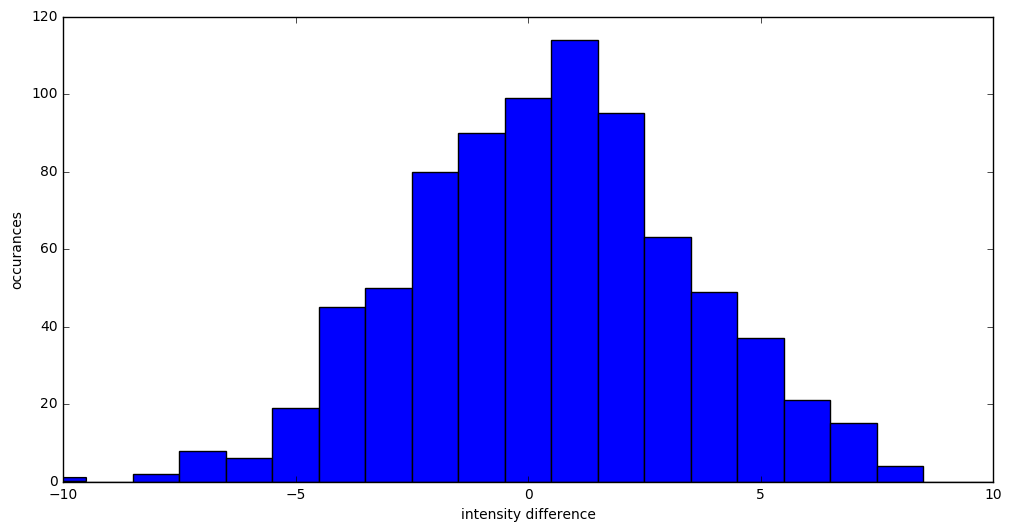

In [150]:
fig, axes = plt.subplots(figsize=(12
                                  ,6))

#plt.plot(col1-col2, '.-', label='difference')
hist = plt.hist(col1-col2, np.arange(-10.5, 11, 1))
plt.xlim(-10, 10)
plt.xlabel('intensity difference')

plt.ylabel('occurances')
hist

Each chunk of 8 vertical pixels of either col1 or col2 is sinusoidal.  Express as

$$ I = A \cos (k z + \phi) $$

In [16]:
col1[200:208]

array([ 128.,  175.,  192.,  172.,  131.,   80.,   61.,   81.])

### Finding the frequency of the Cosine that fits the data

To find the frequency of the cosine function that fits this data, we can perform a Fourier transform and analyze its peaks.

<IPython.core.display.Javascript object>


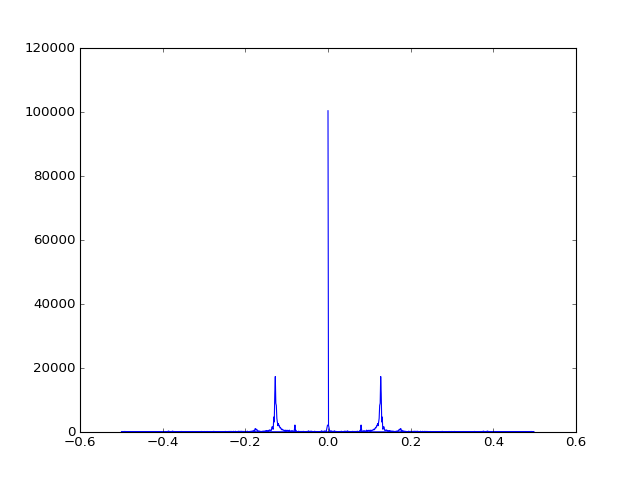

In [17]:
# estimate spatial frequency of black and white lines
fig, axes = plt.subplots()
F = abs(np.fft.fft(col1))

f = np.fft.fftfreq(len(col1))

plt.plot(f, F)
maxfreq_i = F[1:len(F)//2].argmax()
k0 = f[1:len(F)//2][maxfreq_i]

### Finding the cosine function

We start with the equation for a cosine function that may fit this data.

$$ y_i = A cos(k z_i + \phi) + B $$

In this equation we have four unknowns $A$, $k$, $\phi$, and $B$ and thus if we choose four intensity points, we can construct four equations and solve for each of our unknowns. But first, some algebraic simplification.

$$ y_0 - y_1 = A(cos(k z_i + \phi) - cos(k z_{i+1} + \phi)) $$

Now using the trigonometric identity, 

$$ cos\alpha - cos\beta = -2 sin\frac{\alpha + \beta}{2}sin\frac{\alpha - \beta}{2} $$

We can reduce our equation to:

$$ y_i - y_{i+1} = 2Asin(1/2(z_i + z_{i+1}) k + \phi)sin(k) $$

And dividing through by $ y_{i+1} - y_{i+2} $ we get,

$$ \frac{y_i - y_{i+1}}{y_{i+1} - y_{i+2}} = \frac{sin(1/2(z_i + z_{i+1})k + \phi)}{sin(1/2(z_{i+1} + z_{i+2})k + \phi)} $$

In [18]:
import sympy as sp
sp.init_printing()

In [19]:
k, ϕ = sp.symbols('k, ϕ')
cos = sp.cos
sin = sp.sin

y1 = (col1[200] - col1[201])/(col1[201] - col1[202])
y2 = (col1[201] - col1[202])/(col1[202] - col1[203])

f1 = sin(sp.Rational(3,2)*k + ϕ)/sin(sp.Rational(5,2)*k + ϕ)
f2 = sin(sp.Rational(5,2)*k + ϕ)/sin(sp.Rational(7,2)*k + ϕ)
sp.nsolve( [f1 - y1, f2 - y2], [k, ϕ], [k0, 1.0])

matrix(
[['-25.7859831578991'],
 ['-76.6075501680226']])

In [20]:
#sp.plot(f, (k, k0 - 0.04, k0 + 0.04))

In [21]:
col1[200:208]

(col1[200]-col1[201])/ (col1[201]-col1[202])

<IPython.core.display.Javascript object>


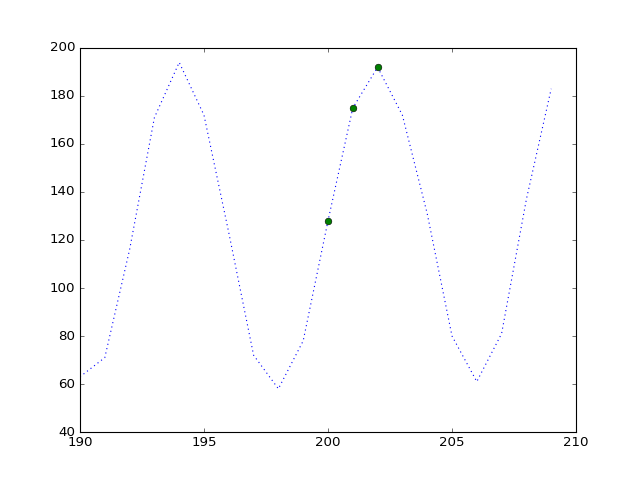

In [23]:
fig, axes = plt.subplots()
plt.plot(np.arange(190, 210), col1[190:210], ':')
plt.plot(np.arange(200, 203), col1[200:203], 'o')

#np.polynomial.polynomial.polyfit(np.sin())

## Least Square Optimization

We can use the least-square optimization function in *scipy* to fit a cosine function (or indeed any other function) to our data. To do this we need to estimate three parameters: the offset, the amplitude, and the phase and so long as our estimate are reasonably close, the function should converge.

Note this method assumes that you know or can calculate the number of periods.

<IPython.core.display.Javascript object>


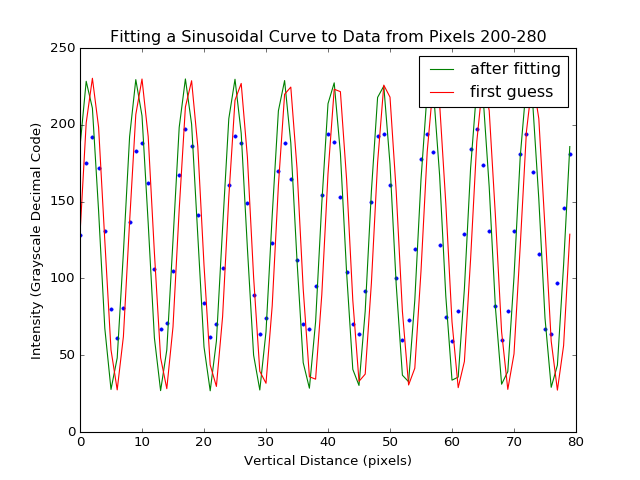

In [24]:
from scipy.optimize import leastsq

N = 80 # number of data points
t = np.linspace(0, 20*np.pi, N)  # number of periods
data = col1[200:280]

guess_mean = np.mean(data)
guess_std = 3*np.std(data)/(2**0.5)  # estimating the offset
guess_phase = 0

# first estimate
data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean

# define function to optimize
optimize_func = lambda x: x[0]*np.sin(t+x[1]) + x[2] - data
est_std, est_phase, est_mean = leastsq(optimize_func, [guess_std, guess_phase, guess_mean])[0]

# recreate the fitted curve using the optimized parameters
data_fit = guess_std*np.sin(t+est_phase) + est_mean

fig, axes = plt.subplots()

plt.plot(data, '.')
plt.plot(data_fit, label='after fitting')
plt.plot(data_first_guess, label='first guess')
plt.title("Fitting a Sinusoidal Curve to Data from Pixels 200-280")
plt.xlabel("Vertical Distance (pixels)")
plt.ylabel("Intensity (Grayscale Decimal Code)")
plt.legend()
plt.show()

In [72]:
est_phase

An alternative to the *optimize* function is the *curve_fit* function. The two functions are similar but curve_fit requires a specification of the frequency and is a bit more user-friendly.

0.864584046851


<IPython.core.display.Javascript object>


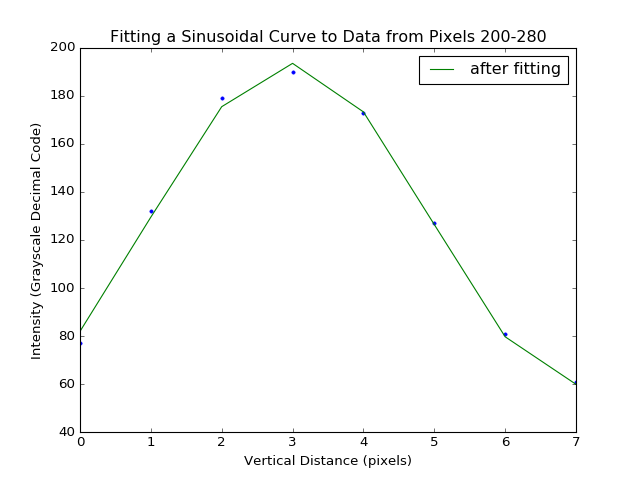

In [25]:
from scipy.optimize import curve_fit

### Tinkering Parameters #########################

#N = 80 # number of data points
#t = np.linspace(0, 20*np.pi, N)  # number of periods
#data = col1[200:380]

#N = 8 # number of data points
#t = np.linspace(0, 2*np.pi, N)  # number of periods
#data = col1[200:208]

N = 8 # number of data points
t = np.linspace(0, 2*np.pi, N)  # number of periods
data = col1[300:308]
##################################################

guess_freq = 0.8646
#guess_amplitude = 3*np.std(data)/(2**0.5)
guess_amplitude = 66.88
guess_phase = -0.7342
guess_offset = np.mean(data)

p0=[guess_freq, guess_amplitude,
    guess_phase, guess_offset]

# create the function we want to fit
def my_sin(x, freq, amplitude, phase, offset):
    return np.sin(x * freq + phase) * amplitude + offset

# now do the fit
fit = curve_fit(my_sin, t, data, p0=p0)
a,b = fit
print(a[0])

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = my_sin(t, *p0)

# recreate the fitted curve using the optimized parameters
data_fit = my_sin(t, *fit[0])

fig, axes = plt.subplots()

plt.plot(data, '.')
plt.plot(data_fit, label='after fitting')
#plt.plot(data_first_guess, label='first guess')
plt.title("Fitting a Sinusoidal Curve to Data from Pixels 200-280")
plt.xlabel("Vertical Distance (pixels)")
plt.ylabel("Intensity (Grayscale Decimal Code)")
plt.legend()
plt.show()

I'm not sure why the curve that was fit isn't smooth.

In [ ]:
### Curve Fit ###

im1 = io.imread(frames[720])*1.0  # reference image
im2 = io.imread(frames[750])*1.0  # current image

xmin = 50; xmax = 130;  # horizontal pixels
zmin = 50; zmax = 130;  # vertical pixels

N = 8  # number of data points
t = np.linspace(0, 2*np.pi, N)  # number of periods

# create the function we want to fit
def my_sin(x, freq, amplitude, phase, offset):
    return np.sin(x * freq + phase) * amplitude + offset

# initialize arrays
freq_arr = np.zeros((400,200))
phase_arr = np.zeros((400,200))

for j in range (0,200):
    k = 0
    for i in np.arange(200,600,8):
        # initial parameter guesses
        guess_freq = 0.86
        guess_amplitude = 70
        guess_phase = 0
        guess_offset = np.mean(im2[i:(i+8),j])
        p0=[guess_freq, guess_amplitude, guess_phase, guess_offset]

        fit = curve_fit(my_sin, t, im2[i:(i+8),j], p0=p0)
        a,b = fit
        freq_arr[k, j] = a[0]
        phase_arr[k, j] = a[2]
        k += 1

In [ ]:
j

In [ ]:
print(freq_arr)

In [35]:
freq_arr[49,1]

In [36]:
freq_arr1 = freq_arr
phase_arr1 = phase_arr

In [37]:
freq_arr2 = freq_arr
phase_arr2 = phase_arr

In [38]:
dz = np.zeros((50,200))
for j in range(0,200):
    for i in range(0,50):
        dz[i,j] = (phase_arr2[i,j] - phase_arr1[i,j])/(0.5*(freq_arr1[i,j] + freq_arr2[i,j]))

In [39]:
dz

array([[  0.,   0.,   0., ...,  nan,  nan,  nan],
       [  0.,   0.,   0., ...,  nan,  nan,  nan],
       [  0.,   0.,   0., ...,  nan,  nan,  nan],
       ..., 
       [  0.,   0.,   0., ...,  nan,  nan,  nan],
       [  0.,   0.,   0., ...,  nan,  nan,  nan],
       [  0.,   0.,   0., ...,  nan,  nan,  nan]])

<IPython.core.display.Javascript object>


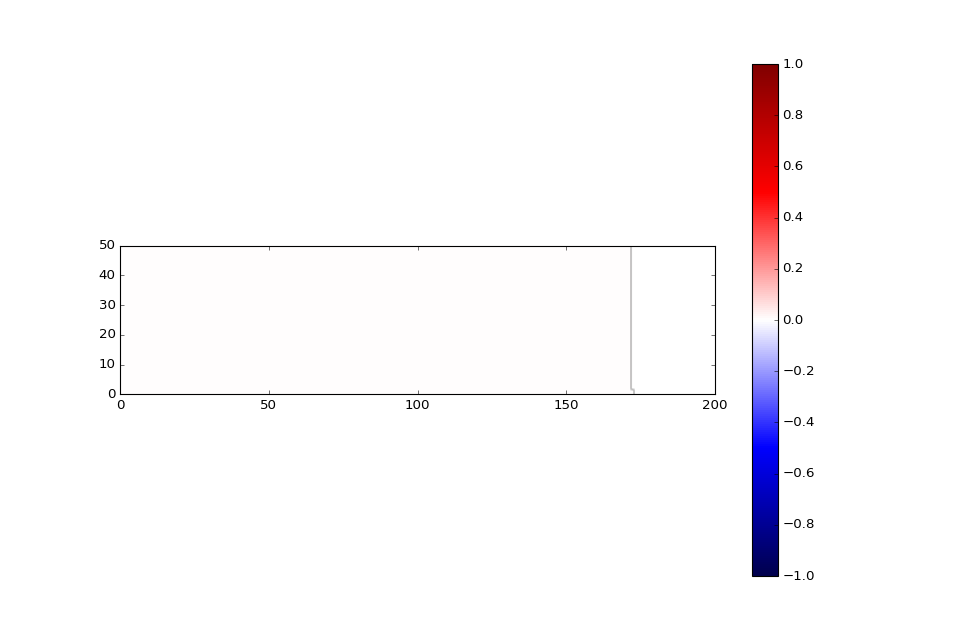

In [40]:
#ref_img = io.imread(frames[1000])*1.0
#img = io.imread(frames[2005])
#diff = img - ref_img

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

m = ax.imshow(dz,
             cmap=plt.get_cmap('seismic'),
             clim = [-1, 1])
ax.axis([0,dz.shape[1], 0, dz.shape[0]])
cb = fig.colorbar(m)

In [43]:
### Curve Fit ###

N = 8  # number of data points
t = np.linspace(0, 2*np.pi, N)  # number of periods
# initial parameter guesses
guess_freq = 0.86
guess_amplitude = 70
guess_phase = 0

# create the function we want to fit
def my_sin(x, freq, amplitude, phase, offset):
    return np.sin(x * freq + phase) * amplitude + offset

dz = np.zeros([2,2])

def coolfunc(im1,im2):

    for j in range (0,2):
        for i in np.arange(0,16,8):
            guess_offset = np.mean(im1[i:(i+8),j])
            p0=[guess_freq, guess_amplitude, guess_phase, guess_offset]
            fit = curve_fit(my_sin, t, im1[i:(i+8),j], p0=p0)
            a,b = fit
            freq_im1 = a[0]
            phase_im1 = a[2]

            guess_offset = np.mean(im2[i:(i+8),j])
            p0=[guess_freq, guess_amplitude, guess_phase, guess_offset]
            fit = curve_fit(my_sin, t, im2[i:(i+8),j], p0=p0)
            a,b = fit
            freq_im2 = a[0]
            phase_im2 = a[2]

            dz[(i/8),j] = (phase_im2 - phase_im1)/(0.5*(freq_im1 + freq_im2))
    return dz

In [44]:
image1 = io.imread(frames[0])
image2 = io.imread(frames[1])

coolfunc(image1,image2)

/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:34: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


array([[-0.03667503, -0.04567302],
       [-0.00320051, -0.00813352]])

In [45]:
def schlieren(img1_filename, img2_filename, 
              window = None,
              **kwargs):
    
    image1 = io.imread(img1_filename)
    image2 = io.imread(img2_filename)
    
    if window is not None:
        image1 = image1[window]
        image2 = image2[window]
        
    dz = schlieren_lines(image1, image2, **kwargs)

    return dz

In [46]:
def schlieren_lines(image1, image2,**kwargs):

    # step 1: calculate the vertical displacement dz in pixel coordinates
    dz = coolfunc(image1, image2)

    return dz

In [1]:
n0 = 750
xmin, xmax = 0, 16
ymin, ymax = 0, 16

numframes = 10
pbar = tqdm_notebook(total=numframes, desc='Rendering', leave=True)

# animation function. This is called sequentially
def animate(i):
    n = n0 + 5*i
    #title.set_text('{} (n={})'.format(frames.index[n].strftime('%H:%M:%S'), n) )
    
    dz = schlieren(frames[0], frames[n], window = (slice(ymin, ymax), slice(xmin, xmax)))
    
    im.set_array(dz)
    pbar.update()
    return (im)

# initialization function: plot the background of each frame
def init():
    im.set_array(ref_img)
    return (im)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=numframes, interval=3, blit=True)

_ = anim.to_html5_video()

#pbar.close()
#plt.close(fig)

#anim

NameError: name 'tqdm_notebook' is not defined

## Messing with Interpolate functions

In [210]:
arrx = np.arange(1,4,1)
shape(arrx)


In [211]:
y = col1[200:203]
shape(y)

In [212]:
#polynomial_fit = np.polyfit(arrx,y,9)
#plt.plot(polynomial_fit)

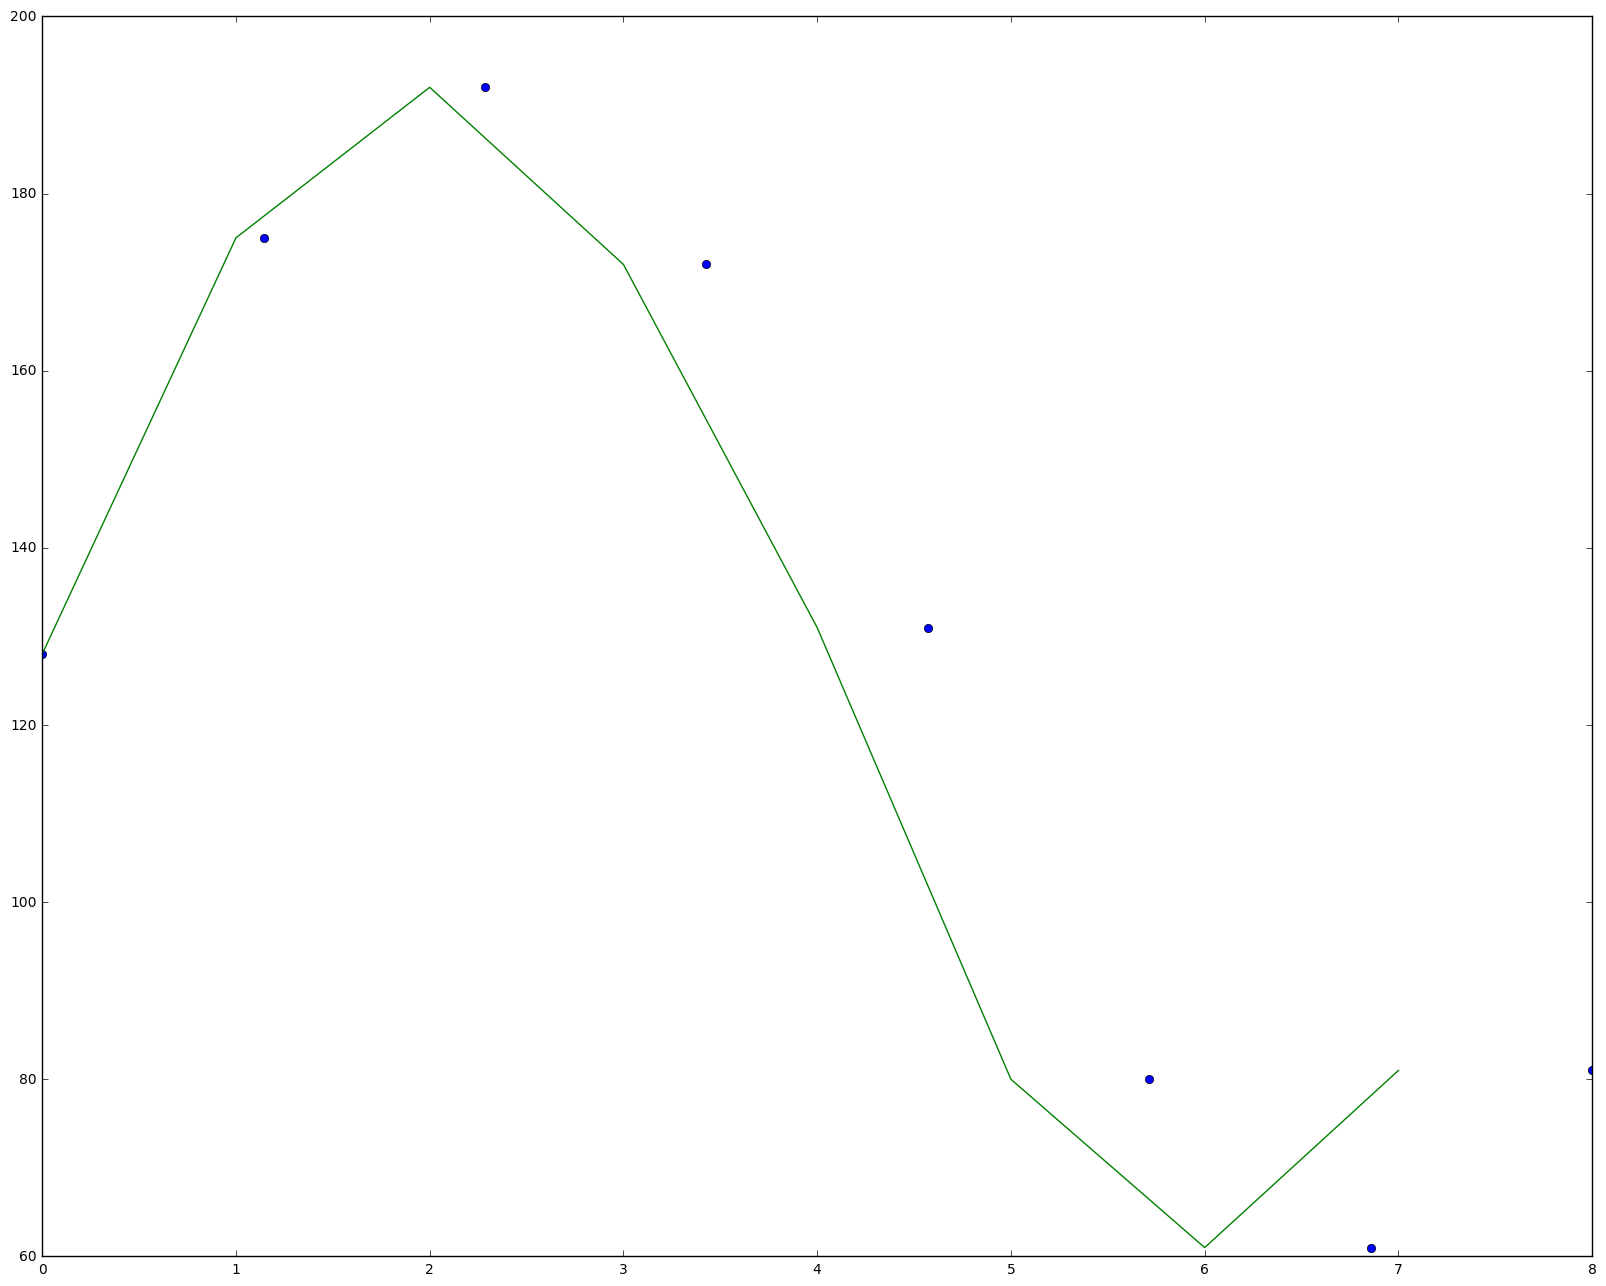

In [219]:
from scipy.interpolate import interp1d

x = np.linspace(0, 8, num=8, endpoint=True)
y = col1[200:208]
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
plt.plot(x,y,'o',f2(x))